In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

In [18]:
df = pd.read_csv('../data/characters.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
(975000, 11) (975000, 26)
(6500, 150, 11) (6500, 150, 26)


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(5265, 150, 11) (650, 150, 11) (585, 150, 11)
(5265, 150, 26) (650, 150, 26) (585, 150, 26)


In [20]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(150, 11), return_sequences=True))
model.add(Dense(units=len(label_dict), activation='softmax'))
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

2023-04-14 02:31:05.426982: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 02:31:05.429261: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 02:31:05.430709: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-04-14 02:31:06.096590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 02:31:06.099573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 02:31:06.102036: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

165/165 [==============================] - ETA: 0s - loss: 2.4661 - accuracy: 0.3343 - precision_1: 0.9882 - recall_1: 0.0135

2023-04-14 02:31:23.042958: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 02:31:23.054829: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 02:31:23.057429: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

165/165 [==============================] - 19s 92ms/step - loss: 2.4661 - accuracy: 0.3343 - precision_1: 0.9882 - recall_1: 0.0135 - val_loss: 1.6761 - val_accuracy: 0.5662 - val_precision_1: 0.9666 - val_recall_1: 0.1001
Epoch 2/50
165/165 [==============================] - 13s 81ms/step - loss: 1.3222 - accuracy: 0.6572 - precision_1: 0.9741 - recall_1: 0.1948 - val_loss: 1.0491 - val_accuracy: 0.7442 - val_precision_1: 0.9584 - val_recall_1: 0.3303
Epoch 3/50
165/165 [==============================] - 14s 83ms/step - loss: 0.9354 - accuracy: 0.7368 - precision_1: 0.9344 - recall_1: 0.4522 - val_loss: 0.8169 - val_accuracy: 0.7580 - val_precision_1: 0.9484 - val_recall_1: 0.5367
Epoch 4/50
165/165 [==============================] - 14s 82ms/step - loss: 0.7495 - accuracy: 0.7741 - precision_1: 0.9315 - recall_1: 0.5731 - val_loss: 0.6432 - val_accuracy: 0.8200 - val_precision_1: 0.9405 - val_recall_1: 0.6276
Epoch 5/50
165/165 [==============================] - 14s 85ms/step - loss:

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 150, 64)           19456     
                                                                 
 dense_1 (Dense)             (None, 150, 26)           1690      
                                                                 
Total params: 21,146
Trainable params: 21,146
Non-trainable params: 0
_________________________________________________________________


In [22]:
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test precision:", results[2])
print("Test recall:", results[3])

21/21 [==============================] - 1s 33ms/step - loss: 0.1159 - accuracy: 0.9682 - precision_1: 0.9755 - recall_1: 0.9623
Test loss: 0.11593634635210037
Test accuracy: 0.9682154059410095
Test precision: 0.9755151867866516
Test recall: 0.9623281955718994


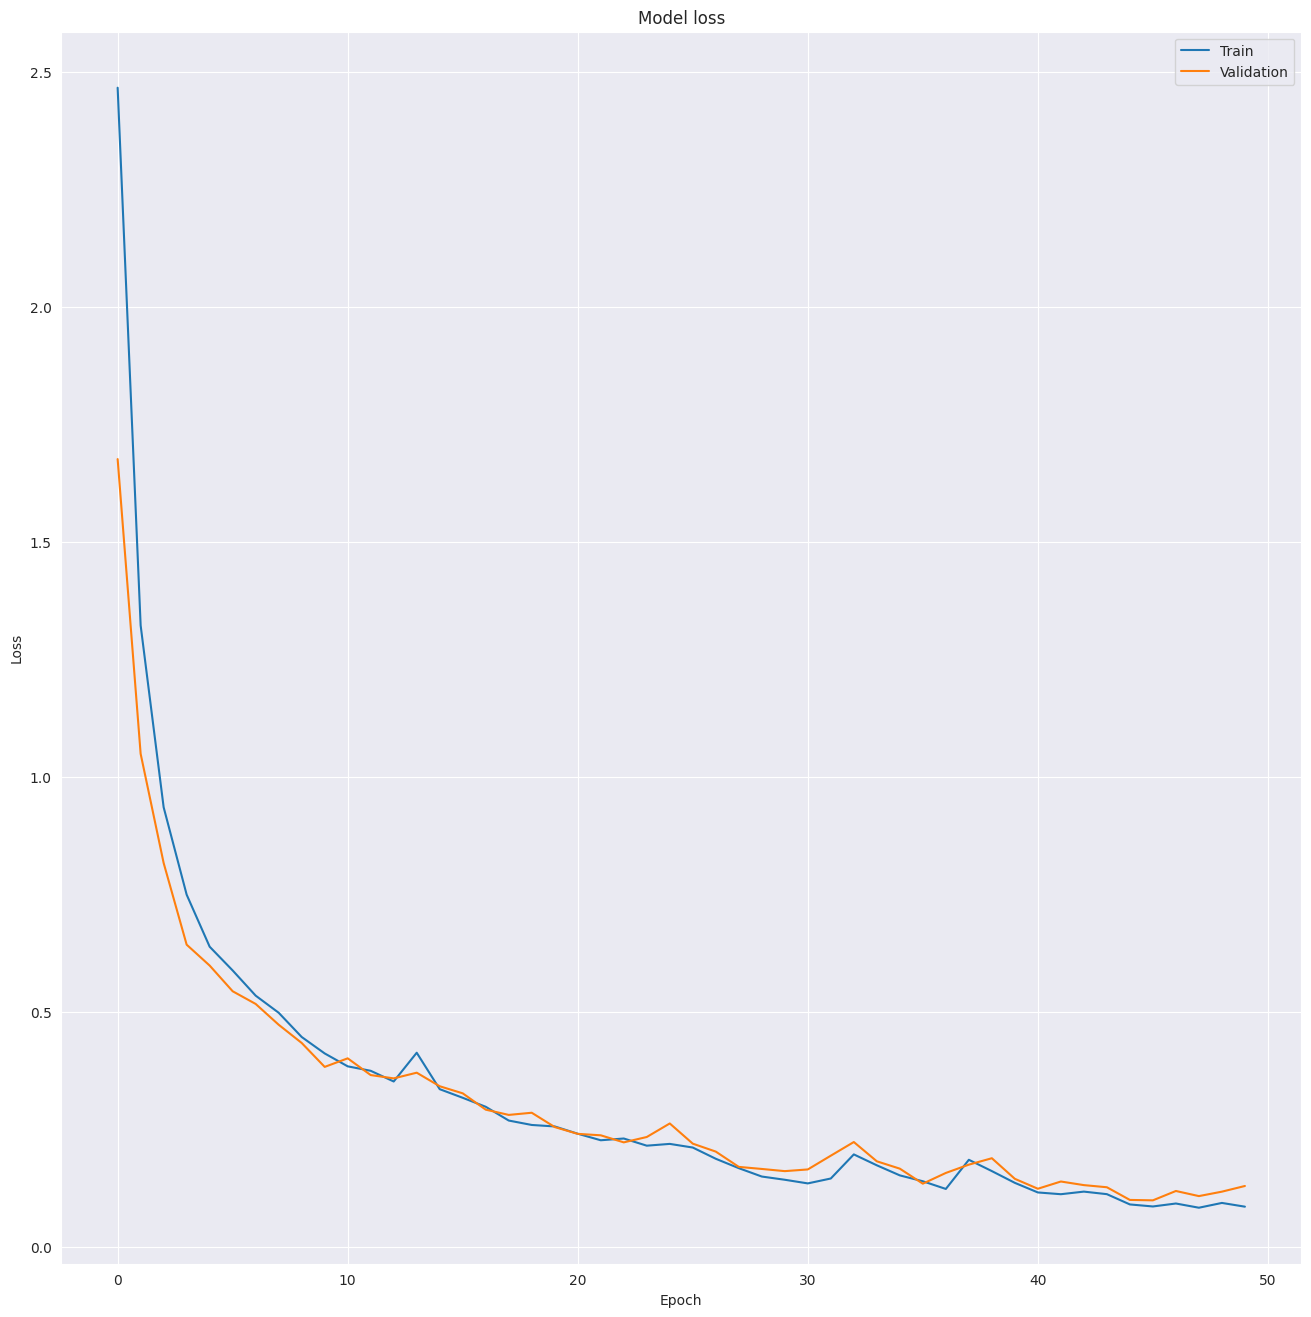

In [23]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

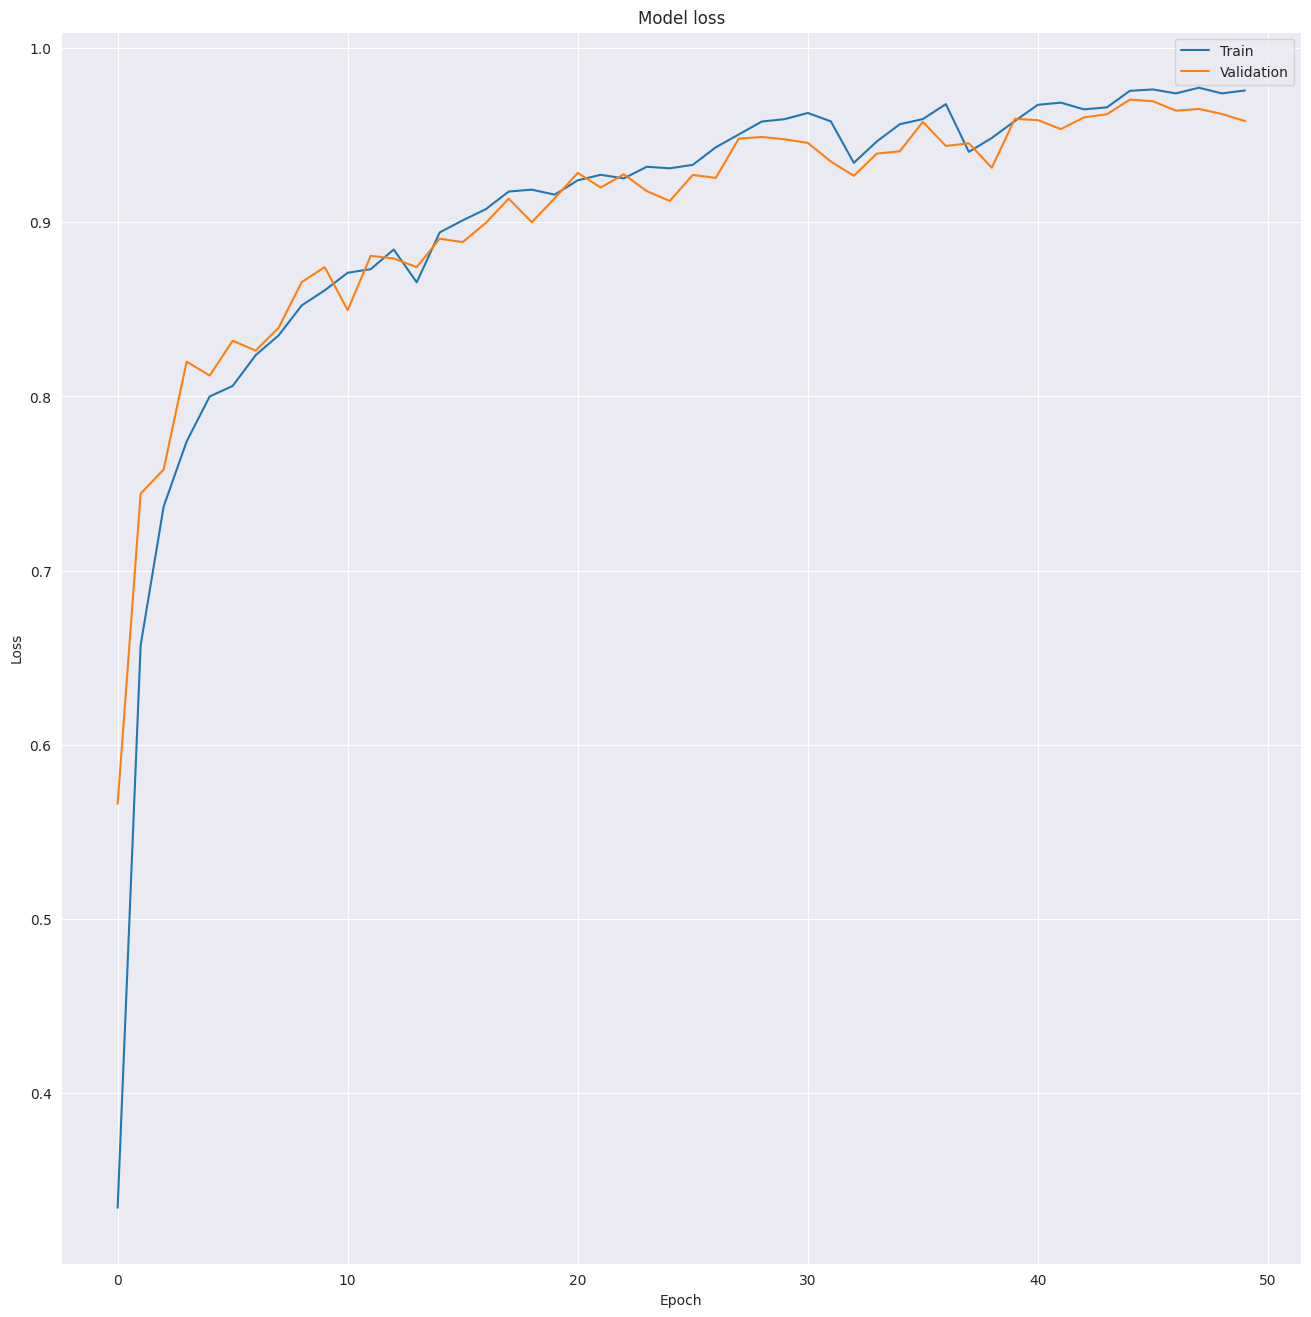

In [24]:
plt.figure(figsize=(16, 16))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [25]:
model.save('../models/characters.h5')

In [26]:
y_pred = model.predict(X_test)
predictions = np.argmax(y_pred, axis=2)
print(predictions)
major = mode(predictions, axis=1)[0].squeeze()
count = mode(predictions, axis=1)[1].squeeze()
print(f"Predictions    : {major}")
print(f"Appeared times : {count}")

2023-04-14 02:45:37.430326: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-14 02:45:37.432995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-14 02:45:37.435646: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

21/21 [==============================] - 1s 24ms/step
[[ 8  8  9 ... 24 24 24]
 [18 18 18 ... 18 18 18]
 [ 4  4  4 ...  4  4  4]
 ...
 [ 1  1  1 ...  1  1  1]
 [24 24 24 ... 24 24 24]
 [ 3  3  3 ... 25 25 25]]
Predictions    : [24 18  4 11  4 18  6 11  6 12  2  9 10 21 23 20 10 16  1 15 11 21 14 21
  9  5  1 23  2  3 12  4  1 23  9  7 19 19  6 12 10  9 24 18  3  2 23  0
 14  0  4 17 16 13  8  0 19  9 20 15 16 20 23 25 24 25  2 12 11 19 16  0
  5  3 23  3 18  9 19 13  8 12 17 22 25  3 16  5  3 17  6  5  7  6  5 11
 23 21 19 13 16 24  9 20  1 23 19  0  7  1 21 23  9 21 25 15 24  6 18 12
 22 15  1 22 20  4 20 16 12 13  8  8 21  2 15 18 12 23  5 23 24 25 22  6
  4  7 21  5  5  7  4 10  9 20 15 20 22 25  6 13  2 14 17 17 16 20 19 22
  8 23  0 12  7 24  9  0 24  8 15  3  3 23  1 25 25  7 22  9 23 18  4 15
 23 21 23  8 24  0 10  6 21 20  7  3  5  1 21 10  6  6  6 11 23 19 10 19
  5 19  7 17 20  9  6  3  6  9  0 20 23 23  4  3  8 24 13  4 23 15 17 25
 24  7 17  4 23 10 23 10 10  2  8  3 18 17 

/tmp/ipykernel_28740/310183563.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  major = mode(predictions, axis=1)[0].squeeze()
/tmp/ipykernel_28740/310183563.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  count = mode(predictions, axis=1)[1].squeeze()


In [27]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

predictions_list = []
for word in major:
    predictions_list.append(get_key(label_dict, word))
print(predictions_list)

['y', 's', 'e', 'l', 'e', 's', 'g', 'l', 'g', 'm', 'c', 'j', 'k', 'v', 'x', 'u', 'k', 'q', 'b', 'p', 'l', 'v', 'o', 'v', 'j', 'f', 'b', 'x', 'c', 'd', 'm', 'e', 'b', 'x', 'j', 'h', 't', 't', 'g', 'm', 'k', 'j', 'y', 's', 'd', 'c', 'x', 'a', 'o', 'a', 'e', 'r', 'q', 'n', 'i', 'a', 't', 'j', 'u', 'p', 'q', 'u', 'x', 'z', 'y', 'z', 'c', 'm', 'l', 't', 'q', 'a', 'f', 'd', 'x', 'd', 's', 'j', 't', 'n', 'i', 'm', 'r', 'w', 'z', 'd', 'q', 'f', 'd', 'r', 'g', 'f', 'h', 'g', 'f', 'l', 'x', 'v', 't', 'n', 'q', 'y', 'j', 'u', 'b', 'x', 't', 'a', 'h', 'b', 'v', 'x', 'j', 'v', 'z', 'p', 'y', 'g', 's', 'm', 'w', 'p', 'b', 'w', 'u', 'e', 'u', 'q', 'm', 'n', 'i', 'i', 'v', 'c', 'p', 's', 'm', 'x', 'f', 'x', 'y', 'z', 'w', 'g', 'e', 'h', 'v', 'f', 'f', 'h', 'e', 'k', 'j', 'u', 'p', 'u', 'w', 'z', 'g', 'n', 'c', 'o', 'r', 'r', 'q', 'u', 't', 'w', 'i', 'x', 'a', 'm', 'h', 'y', 'j', 'a', 'y', 'i', 'p', 'd', 'd', 'x', 'b', 'z', 'z', 'h', 'w', 'j', 'x', 's', 'e', 'p', 'x', 'v', 'x', 'i', 'y', 'a', 'k', 'g',

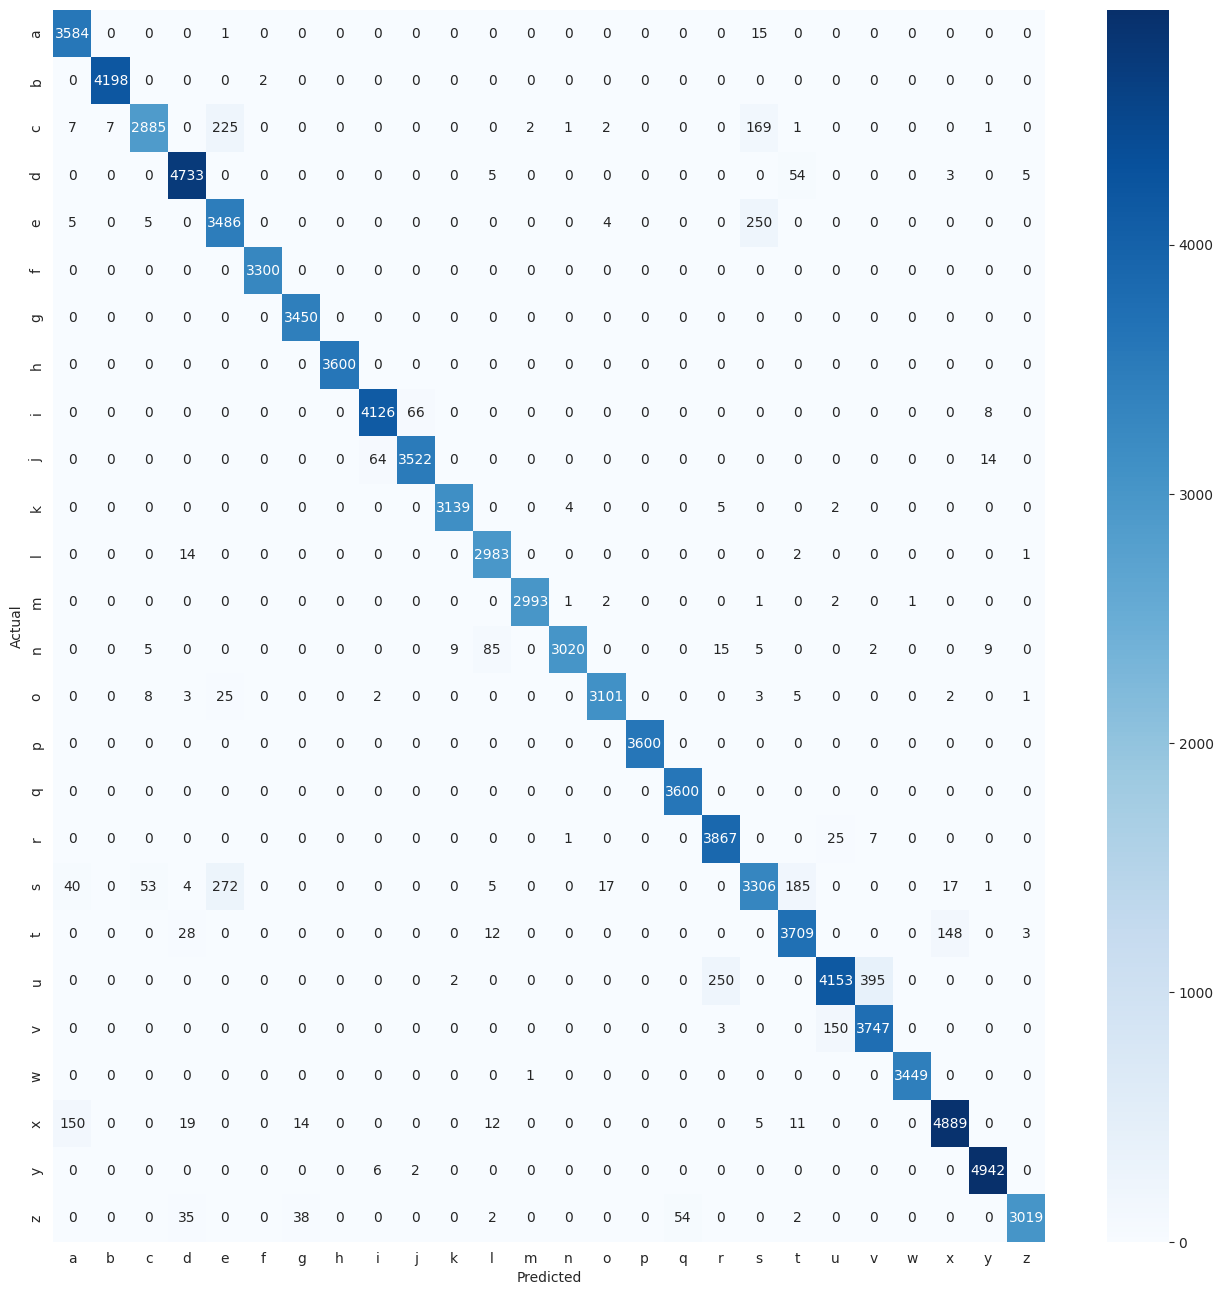

Accuracy: 96.82%


In [28]:
words_cm = confusion_matrix(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(16, 16))
sns.heatmap(words_cm, annot=True, cmap='Blues', fmt='g', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [29]:
print(classification_report(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3600
           1       1.00      1.00      1.00      4200
           2       0.98      0.87      0.92      3300
           3       0.98      0.99      0.98      4800
           4       0.87      0.93      0.90      3750
           5       1.00      1.00      1.00      3300
           6       0.99      1.00      0.99      3450
           7       1.00      1.00      1.00      3600
           8       0.98      0.98      0.98      4200
           9       0.98      0.98      0.98      3600
          10       1.00      1.00      1.00      3150
          11       0.96      0.99      0.98      3000
          12       1.00      1.00      1.00      3000
          13       1.00      0.96      0.98      3150
          14       0.99      0.98      0.99      3150
          15       1.00      1.00      1.00      3600
          16       0.99      1.00      0.99      3600
          17       0.93    

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(predictions_list))
engine.runAndWait()